### Data Import 

Import the required packages

In [1]:

import numpy as np # Simple linear algebra calculations
import pandas as pd # pandas to read csv files 
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud
import re
import gensim
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, f1_score
from tqdm import tqdm

Import the dataset, which consists on training set labeled and an unlabeled test set. 

In [3]:
import os
for dirname, _, filenames in os.walk('/Users/aymentiouiri/Desktop/workspace/Sentiment-Analysis/data/tweet-hatred-speech'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/aymentiouiri/Desktop/workspace/Sentiment-Analysis/data/tweet-hatred-speech/test.csv
/Users/aymentiouiri/Desktop/workspace/Sentiment-Analysis/data/tweet-hatred-speech/train.csv


In [4]:
df = pd.read_csv('/Users/aymentiouiri/Desktop/workspace/Sentiment-Analysis/data/tweet-hatred-speech/train.csv')
test = pd.read_csv('/Users/aymentiouiri/Desktop/workspace/Sentiment-Analysis/data/tweet-hatred-speech/test.csv')

### Data Quality 

We are going to investigate the quality of the dataset by  checking for null values, the structure of the data, outliers and the label distribution.


In [8]:
df.head(20) #check for anomalies by looking at the top 20 tweets. 

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [10]:
# check for null values 
df.isnull().sum() # this checks whether for each column we have null values and sums the total number

id       0
label    0
tweet    0
dtype: int64

In [13]:
# check for the label distribution
df['label'].value_counts() # this counts the number of elements in the label column by category

label
0    29720
1     2242
Name: count, dtype: int64

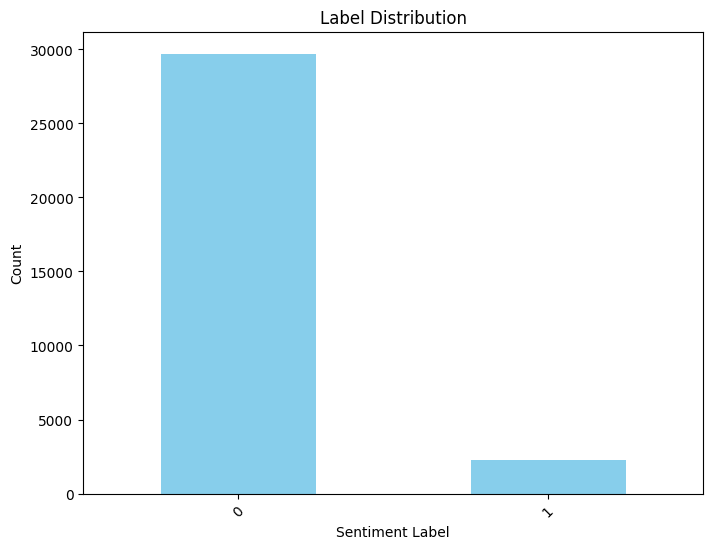

In [14]:
plt.figure(figsize=(8, 6))
df['label'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Label Distribution')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

We clearly see that the dataset is unbalanced. We might consider to use upsampling for category 1 in order to have a balanced training set.

In [15]:
# check for outliers, a tweet would be considered as outlier if the length of the tweet exceeds 280 
df['text_length'] = df['tweet'].apply(lambda x: len(str(x)))
text_length_stats = df['text_length'].describe()
print("Text Length Statistics:")
print(text_length_stats)

# The statistic description shows that the maximum is 274 characters



Text Length Statistics:
count    31962.000000
mean        84.739628
std         29.455749
min         11.000000
25%         63.000000
50%         88.000000
75%        108.000000
max        274.000000
Name: text_length, dtype: float64
